<a href="https://colab.research.google.com/github/l-Monarch-l/Laborat/blob/main/%D0%BF%D1%80%D0%B0%D1%82%D0%B8%D0%BA%D0%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [2]:
df = pd.read_csv('/content/diamond.csv')

In [3]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [4]:
df['TME_diamond'] = np.where(df['Price'] >= 15000, 1, 0).astype(int)
df.TME_diamond = df.TME_diamond.astype('float64')
df['Cut'] = df['Cut'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Clarity'] = df['Clarity'].astype('category')
df['Polish'] = df['Polish'].astype('category')
df['Symmetry'] = df['Symmetry'].astype('category')
df['Report'] = df['Report'].astype('category')

In [5]:
Y = df['TME_diamond']
X = df.drop('TME_diamond', axis=1)

X = X.drop('Price', axis=1)

In [6]:
df.drop('Price', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Carat Weight  6000 non-null   float64 
 1   Cut           6000 non-null   category
 2   Color         6000 non-null   category
 3   Clarity       6000 non-null   category
 4   Polish        6000 non-null   category
 5   Symmetry      6000 non-null   category
 6   Report        6000 non-null   category
 7   TME_diamond   6000 non-null   float64 
dtypes: category(6), float64(2)
memory usage: 130.3 KB


In [7]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,TME_diamond
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,0.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,0.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,0.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,0.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,0.0
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,0.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,0.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,0.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,0.0


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Carat Weight  6000 non-null   float64 
 1   Cut           6000 non-null   category
 2   Color         6000 non-null   category
 3   Clarity       6000 non-null   category
 4   Polish        6000 non-null   category
 5   Symmetry      6000 non-null   category
 6   Report        6000 non-null   category
dtypes: category(6), float64(1)
memory usage: 83.4 KB


In [9]:
X_processed = X.copy()
category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True)

In [10]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()
scaler = MinMaxScaler()
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [12]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.037037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.046296,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.074074,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,0.115741,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,0.125000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [14]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9829
Точность на тестовой выборке: 0.9833

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       899
         1.0       0.99      0.95      0.97       301

    accuracy                           0.98      1200
   macro avg       0.98      0.97      0.98      1200
weighted avg       0.98      0.98      0.98      1200



LogisticRegression(max_iter=1000)

Как я понимаю, скорее всего у меня такие значения из-за малого количества числовых значений, у меня есть вес и самые дорогие бриллианты(который вообще состоит из 0 и 1) поэтому такой результат близкий к 1 из-за этого. Ну а цены были дропнуты, как и СДБ, в итоге остались одни веса. Допустил ли я ошибку до этого и стоило мне иначе как то с данными поработать или всё в порядке?

In [15]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [16]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [17]:
X_processed.describe()

,Carat Weight
count,6000.000000
mean,0.270611
std,0.220230
min,0.000000
25%,0.115741
50%,0.175926
75%,0.388889
max,1.000000


In [18]:
X_iqr.describe()

,Carat Weight
count,6000.000000
mean,0.270611
std,0.220230
min,0.000000
25%,0.115741
50%,0.175926
75%,0.388889
max,1.000000


In [19]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9600
Точность на тестовой выборке: 0.9650

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       899
         1.0       0.96      0.89      0.93       301

    accuracy                           0.96      1200
   macro avg       0.96      0.94      0.95      1200
weighted avg       0.96      0.96      0.96      1200



LogisticRegression(max_iter=1000)

Смотря на данный метод, результат ухуджился, причём очень заметно, хотя если обратить внимание на таблицы x_iqr и x_processed одинаковы и данные никак не отличаются друг от друга, так что скорее всего работа через метод iqr менее эффективно

In [20]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [21]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [22]:
X_processed.describe()

,Carat Weight
count,6000.000000
mean,0.270611
std,0.220230
min,0.000000
25%,0.115741
50%,0.175926
75%,0.388889
max,1.000000


In [23]:
X_mean.describe()

,Carat Weight
count,5796.000000
mean,0.252114
std,0.200019
min,0.000000
25%,0.115741
50%,0.166667
75%,0.365741
max,0.708333


In [24]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.9577
Точность на тестовой выборке: 0.9672

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       899
         1.0       0.96      0.89      0.92       261

    accuracy                           0.97      1160
   macro avg       0.96      0.94      0.95      1160
weighted avg       0.97      0.97      0.97      1160



LogisticRegression(max_iter=1000)

Этот метод mean ещё менее точен чем iqr. Можно заметить что было выброшено несколько значений, и скорее всего это именно значения с высоким весом, которые было маловато и были аномальными. Об этом говорит уменьшение максимального значения довольно значительно, также уменьшение среднего значения и всех остальных значений. Точность по сравнению с прошлым методом немного лучше.

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [26]:
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [27]:
selector.scores_

array([1.72003822e+04, 9.12359321e+00, 1.95445660e+01, 9.23830777e+00,
       1.14214508e-01, 1.40695712e+01, 1.19198888e+00, 1.24343884e+01,
       2.83202974e-02, 1.04813693e+01, 3.86377518e+01, 1.54635121e+02,
       3.74893391e+01, 1.37159744e+01, 6.68609124e+00, 1.22101688e-02,
       2.51405780e+01, 1.03969205e+01, 6.88155129e-01, 2.71863525e+00,
       1.03656294e+01, 6.40287896e+00, 6.58711912e+00])

In [28]:
X_processed.columns

Index(['Carat Weight', 'Cut_Good', 'Cut_Ideal', 'Cut_Signature-Ideal',
       'Cut_Very Good', 'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I',
       'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_G', 'Polish_ID', 'Polish_VG',
       'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA'],
      dtype='object')

In [29]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.037037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.046296,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.074074,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,0.115741,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,0.125000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
selector = SelectKBest(score_func=chi2, k=3)
X_kbest = selector.fit_transform(X_processed, Y)

In [31]:
selector.scores_

array([7.97196977e+02, 8.03746660e+00, 1.14262192e+01, 8.83809699e+00,
       6.80170816e-02, 1.22206339e+01, 9.90874865e-01, 9.30753247e+00,
       2.32349993e-02, 8.77796686e+00, 3.70015317e+01, 9.90497567e+01,
       2.98648100e+01, 1.00958174e+01, 6.36353189e+00, 1.08584374e-02,
       2.26606363e+01, 9.35280341e+00, 4.11950914e-01, 2.30331440e+00,
       9.30227568e+00, 3.82078215e+00, 8.05208641e-01])

In [32]:
X_processed.columns

Index(['Carat Weight', 'Cut_Good', 'Cut_Ideal', 'Cut_Signature-Ideal',
       'Cut_Very Good', 'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I',
       'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2',
       'Clarity_VVS1', 'Clarity_VVS2', 'Polish_G', 'Polish_ID', 'Polish_VG',
       'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA'],
      dtype='object')

Тут видно что лучшие значения изменились в selector.scores, а колонки не изменились

In [33]:
selector.get_support(indices=True)

array([ 0, 10, 11])

In [34]:
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Carat Weight', 'Clarity_IF', 'Clarity_SI1'], dtype='object')


In [35]:
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9642
Точность на тестовой выборке: 0.9658

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       899
         1.0       0.95      0.91      0.93       301

    accuracy                           0.97      1200
   macro avg       0.96      0.95      0.95      1200
weighted avg       0.97      0.97      0.97      1200



LogisticRegression(max_iter=1000)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Carat Weight', 'Color_H', 'Color_I', 'Clarity_IF', 'Clarity_SI1'], dtype='object')


In [37]:
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.9735
Точность на тестовой выборке: 0.9800

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       899
         1.0       0.98      0.94      0.96       301

    accuracy                           0.98      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.98      0.98      0.98      1200



Коэффициенты модели без регуляризации: [[ 1.91952823e+01  2.35019837e-02  5.03492617e-02  8.94384072e-01
  -1.34046037e-02 -7.41326738e-01 -5.82705942e-01 -1.20410233e+00
  -2.17176607e+00 -2.82044208e+00  1.47816298e+00 -1.87884216e+00
  -3.88280156e-01 -7.75461359e-01  6.53392090e-01  1.35388354e-01
  -3.36039267e-01 -2.36399751e-01 -1.61207989e-01 -6.73664231e-02
  -2.66399927e-01 -2.48336723e-01  1.03978623e-02]]
Коэффициенты модели с регуляризацией: [[42.3630874  -0.33178441  0.          1.76094995 -0.4368324  -1.51616181
  -1.45282253 -3.18118343 -6.02244886 -7.39865848  3.26301525 -5.13165322
  -1.40809308 -2.65665716  1.259486    0.         -0.37615363  0.
  -0.34729538 -0.19477847 -0.59387194 -0.51816307  0.        ]]
Отобранные признаки: Index(['Carat Weight', 'Cut_Good', 'Cut_Signature-Ideal', 'Cut_Very Good',
       'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Clarity_IF',
       'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1', 'Polish_G',
       'Pol

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[42.36280498 -0.33206031  1.76092759 -0.4370046  -1.51558992 -1.45191641
  -3.18067609 -6.02172283 -7.39884041  3.26307443 -5.13128076 -1.40792064
  -2.65648209  1.25954177 -0.37488979 -0.34592367 -0.19491972 -0.59320344
  -0.5186463 ]]


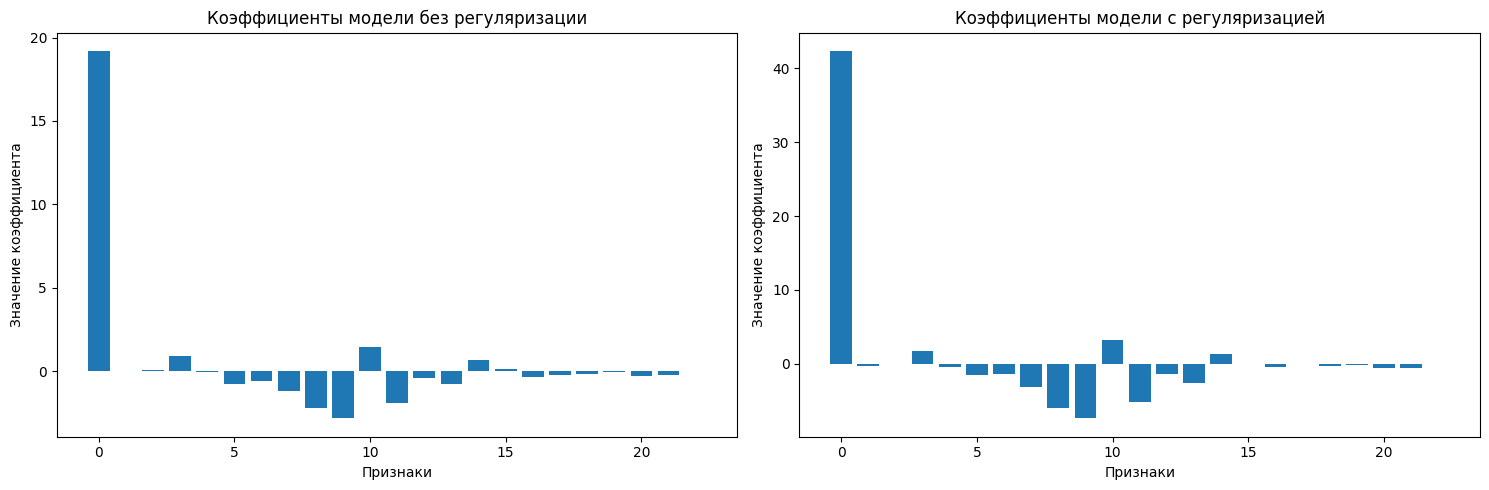

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [45]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.9833
Точность на тестовой выборке: 0.9825

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       899
         1.0       0.98      0.95      0.96       301

    accuracy                           0.98      1200
   macro avg       0.98      0.97      0.98      1200
weighted avg       0.98      0.98      0.98      1200



Самыйм лучшим результатом k=3, с такой k, в тестах получались более точные варианты. Если так посмотреть метод embedded являются с самым лучшим и точным результатом, из чего можно сделать вывод что для моей базы данных он подходит лучше всего.

In [39]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [40]:
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


In [41]:
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [42]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

K-Fold Cross-Validation - Средняя точность: 0.9816666666666667
Точности по каждому фолду: [0.985, 0.9791666666666666, 0.9791666666666666, 0.9866666666666667, 0.9783333333333334]


Можно заметить что разница по фолду очень большая, почти на 1 разница, но в целом, средння точно поялучилось в данной ситуации лучше чем в остальных вариантах, и является наиболее точной.

In [43]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())


ShuffleSplit Cross-Validation - Средняя точность: 0.9795833333333335
Точности по каждому разделению: [0.9779166666666667, 0.9779166666666667, 0.9816666666666667, 0.9804166666666667, 0.98]


Разделения получились с заметными отличиями, но в целом можно увидеть что разница не сильно велика, что говорит о том машина вывела результат верно. Хотя и данный результат является хуже остальных вариантов.

In [44]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.9808333333333333
Точность на тестовых данных: 0.9833333333333333


Тестовые данные получились более точны чем основная чать данных, но в целом можно увидеть что разница не сильно велика, что говорит о том машина вывела результат верно.

Самый точный результат можно увидеть у k-fold cross-validication. Он подходит лучше всего для моей базы данны, поскольку у меня небольшая база данных, ну относительно, ну и также я мог получить наиболее точную оценку для моих данных. В осноном для анализа брался carat weight. Остальные подходят для более большогого количества данных, да и просто посмотрев результаты можно увидеть что они менее точны.